# Import necessary packages/classes/modules/functions

In [1]:
import statistics as stats
import math 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os
sys.path.insert(0, os.path.abspath('../src'))
import data
from rat import TristanRat

# Set the project working directory to the root folder

In [2]:
os.chdir('..')

# Plot time curves

Using the `TristanRat` class default values, create a function which outputs three respective time curve plots for:

1. The propagators of the individual compartments in the 2-compartment exchange model (2CXM) for a simplified model of the rat circulation, i.e., concentration in the plasma compartment, `cp`, and concentration in the extracellular compartment, `ce` (both in mmol/mL)
2. Calculated MRI signals in rat spleen and liver (both in arbitrary units (a.u.))
3. Simulated MRI signals in rat spleen and liver (both in a.u.)
3. Fitted simulated MRI signals in rat spleen and liver (both in a.u.)

Time on the x-axis is plotted in seconds.

In [3]:
def plot_time_curves():
    rat = TristanRat() # get TristanRat class default values
    rat.plot_whole_body_concentrations() # plot cp & ce calculated from 2CXM
    rat.plot_signals() # plot calculated MRI signals
    rat.plot_data() # plot simulated MRI signals
    rat.plot_fit() # plot fitted simulated MRI signals

Run the function.

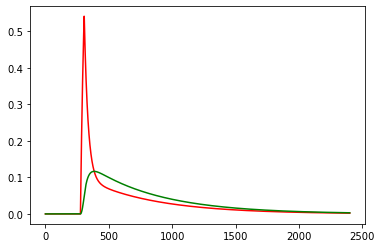

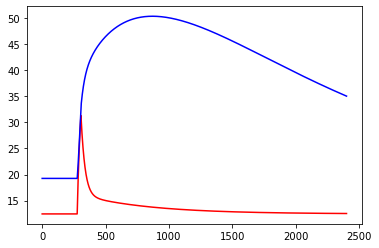

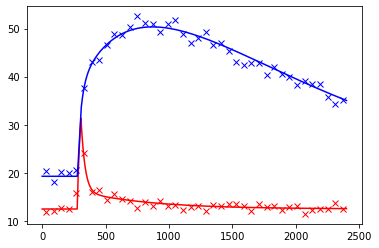

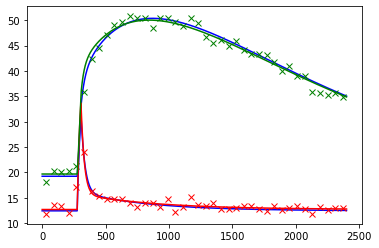

In [4]:
plot_time_curves()

# Set an MRI sequence

Create a function to set TristanRat class default values to different values to adjust MRI sequence parmeters. Plot fitted simulated MRI signals in rat spleen and liver (both in a.u.) using these adjusted parameters.

Time on the x-axis is plotted in seconds.

In [5]:
def set_sequence():

    rat = TristanRat() # get TristanRat class default values
    rat.SNR0 = 100 # set signal to noise ratio
    rat.FA = 50 # set MRI sequence flip angle (degrees)
    rat.TR = 2.0 # set MRI sequence repetition time (sec)
    rat.plot_fit() # plot fitted simulated MRI signals

Run the function.

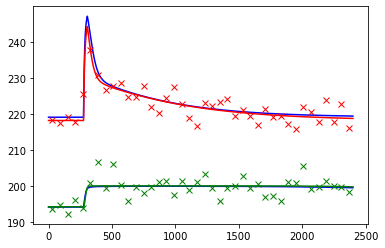

In [6]:
set_sequence()

# Adjust noise sensitivity

Create a function to plot the estimated values for the TristanRat model free parameters, the gadoxetate extraction fraction, `E`, and the mean transit time of the hepatocytes, `Th`, according to varying noise sensitivity.

In [7]:
def noise_sensitivity():
    SNR0_range = range(5, 100, 1) # simulate a sample SNR range from 5 to 100 incrementing by 1
    E = [] # create empty list for appending estimated E values
    Th = [] # create empty list for appending estimated Th values
    rat = TristanRat() # get TristanRat class default values
    for SNR0 in SNR0_range: # for each increment of the SNR range...
        rat.SNR0 = SNR0 # set signal to noise ratio
        rat.simulate_data() # simulate MRI signal data
        rat.fit() # fit the simulated MRI signal data
        E.append(rat.liver_variables[0]) # append fitted/estimated E values to empty list
        Th.append(rat.liver_variables[1]) # append fitted/estimated Th values to empty list
        rat.initialize_variables() # initialise the variables
    # Plot estimated parameters vs. SNR
    plt.plot(SNR0_range, [rat.E]*len(E), color='red')
    plt.plot(SNR0_range, E, marker="x", color='red', linewidth=0)
    plt.show()
    plt.plot(SNR0_range, [rat.Th]*len(Th), color='red')
    plt.plot(SNR0_range, Th, marker="x", color='red', linewidth=0)
    plt.show()

Run the function.

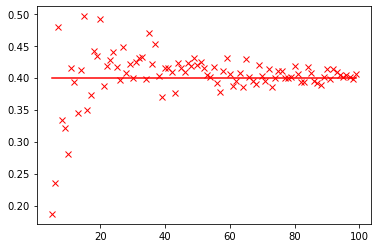

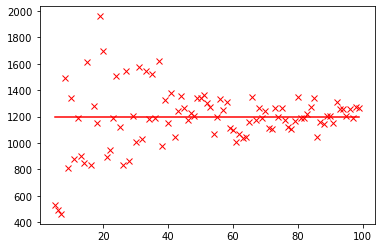

In [8]:
noise_sensitivity()

# Simulate an MRI measurement

Create a function to simulate an MRI measurement within rat spleen and liver.

In [9]:
def simulate_measurement():

    studyrat = TristanRat() # get TristanRat class default values
    studyrat.E = 0.1 # set gadoxetate extraction fraction, E
    studyrat.Th = 5*60 # set mean transit time, Th
    studyrat.SNR0 = 10 # set SNR
    studyrat.initialize_variables() # initialise variables
    studyrat.calculate_signals() # calculate rat spleen and liver MRI signals
    studyrat.simulate_measurement() # simulate measurements of the calculated MRI signals

    rat = TristanRat() # get TristanRat class default values
    rat.set_spleen_data(studyrat.spleen_sampling_times, studyrat.spleen_data) # obtain sample rat spleen data from the simulated MRI signal
    rat.set_liver_data(studyrat.liver_sampling_times, studyrat.liver_data)  # obtain sample rat liver data from the simulated MRI signal
    rat.fit() # fit the sampled data to the simulated signal data
    
    # plot fitted simulated spleen MRI signal 
    plt.plot(studyrat.t, studyrat.spleen_signal, color='blue')
    # plot sampled spleen MRI signal data
    plt.plot(studyrat.spleen_sampling_times, studyrat.spleen_data, marker="x", color='blue', linewidth=0)
    # plot fitted sample spleen MRI signal data
    plt.plot(rat.t, rat.spleen_signal, color='red')

    # plot fitted simulated liver MRI signal 
    plt.plot(studyrat.t, studyrat.liver_signal, color='blue')
    # plot sampled liver MRI signal data
    plt.plot(studyrat.liver_sampling_times, studyrat.liver_data, marker="x", color='blue', linewidth=0)
    # plot fitted sample liver MRI signal data
    plt.plot(rat.t, rat.liver_signal, color='green')

    plt.show()

    # print exact vs estimated/fitted values for E and Th
    print("Exact E: ", studyrat.E)
    print("Fitted E: ", rat.liver_variables[0])
    print("Exact Th: ", studyrat.Th)
    print("Fitted Th: ", rat.liver_variables[1])

Run the function

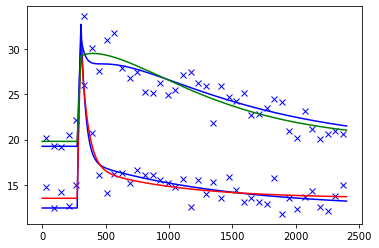

Exact E:  0.1
Fitted E:  0.12933547714120952
Exact Th:  300
Fitted Th:  406.36984936712673


In [10]:
    
simulate_measurement()

# Fit example data

Create a function to extract an example file from the Six Test Compound MRI signal source data folder (i.e., `data/SixTestCompounds/01_signals`).

In [11]:
def get_example_data(study, file_number):
    """Selects a single MRI signal data file from data folder.
    
    Args:
        study: Study name of interest in string format (e.g., 'SixTestCompounds')
        file_number: Integer file number of interest (e.g., 10)
    
    Returns:
        df: DataFrame contained within the example file csv
        filenames[file_number]: MRI signal data filename of interest.
    """
    data_dir = data.get_path(study, "data") # get path to data directory
    file_list, filenames = data.get_files(study, '01_signals') # get list of files and filenames contained within
    example_file = file_list[file_number] # select chosen example file from file list
    df = pd.read_csv(example_file) # open example file csv as a DataFrame
    
    return df, filenames[file_number]

Create a function to fit the observed rat spleen and liver MRI signal data contained within the example file using the `TristanRat` class model. Plot the modelling outputs and store fitted spleen and liver MRI signal data in new dataframe.

In [20]:
def fit_data_example(study, file_number):
    """Fits example MRI signal csv file.
    Args:
        study: Study name of interest in string format (e.g., 'SixTestCompounds')
        file_number: Integer file number of interest (e.g., 10)
    Returns:
        DataFrame containing fitted spleen and liver MRI signal data
    """
    df_data, filename = get_example_data(study, file_number) # get example MRI signal csv data file
    ts = df_data["Time (s)"].values # extract MRI sequence sampling times from example csv file

    rat = TristanRat() # get TristanRat class default values
    rat.dt = ts[1] - ts[0] # set MRI sequence sampling duration
    rat.set_spleen_data(ts, df_data["Spleen (a.u.)"].values) # set MRI signal spleen data from example csv file
    rat.set_liver_data(ts, df_data["Liver (a.u.)"].values) # set MRI signal liver data from example csv file
    rat.fit() # fit the example MRI signal csv data

    # plot fitted spleen MRI signal data
    plt.plot(rat.t, rat.spleen_signal, color='red')
    # plot observed spleen MRI signal data
    plt.plot(rat.spleen_sampling_times, rat.spleen_data, marker="x", color='red', linewidth=0)
    # plot fitted liver MRI signal data
    plt.plot(rat.t, rat.liver_signal, color='green')
    # plot observed liver MRI signal data
    plt.plot(rat.liver_sampling_times, rat.liver_data, marker="x", color='green', linewidth=0)

    # save 
    df_results = pd.DataFrame({"Time fit (s)": rat.t})
    df_results["Spleen fit (a.u.)"] = rat.spleen_signal
    df_results["Liver fit (a.u.)"] = rat.liver_signal
    df_output = pd.concat([df_data, df_results], axis=1)
    
    return df_output

Run the function to store the fitted signals and show the plots.

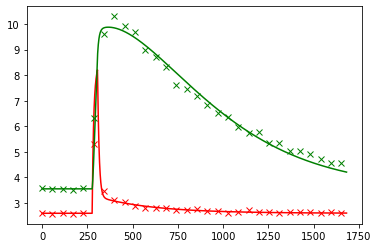

In [24]:
fitted_signals = fit_data_example('SixTestCompounds', 22)

Print fitted signals DataFrame to screen.

In [23]:
fitted_signals

,Time (s),Spleen (a.u.),Liver (a.u.),Time fit (s),Spleen fit (a.u.),Liver fit (a.u.)
0,0.0,2.62646,3.59858,0.0,2.602048,3.556332
1,57.0,2.57671,3.55293,0.5,2.602048,3.556332
2,114.0,2.61969,3.54801,1.0,2.602048,3.556332
3,171.0,2.58533,3.52581,1.5,2.602048,3.556332
4,228.0,2.61400,3.59659,2.0,2.602048,3.556332
...,...,...,...,...,...,...
3359,NaN,NaN,NaN,1679.5,2.609634,4.214084
3360,NaN,NaN,NaN,1680.0,2.609621,4.213285
3361,NaN,NaN,NaN,1680.5,2.609609,4.212487
3362,NaN,NaN,NaN,1681.0,2.609597,4.211689
